# sudo apt-get install graphviz

# pip install torchviz

In [16]:
import torch
from torch import nn
from torchviz import make_dot, make_dot_from_trace

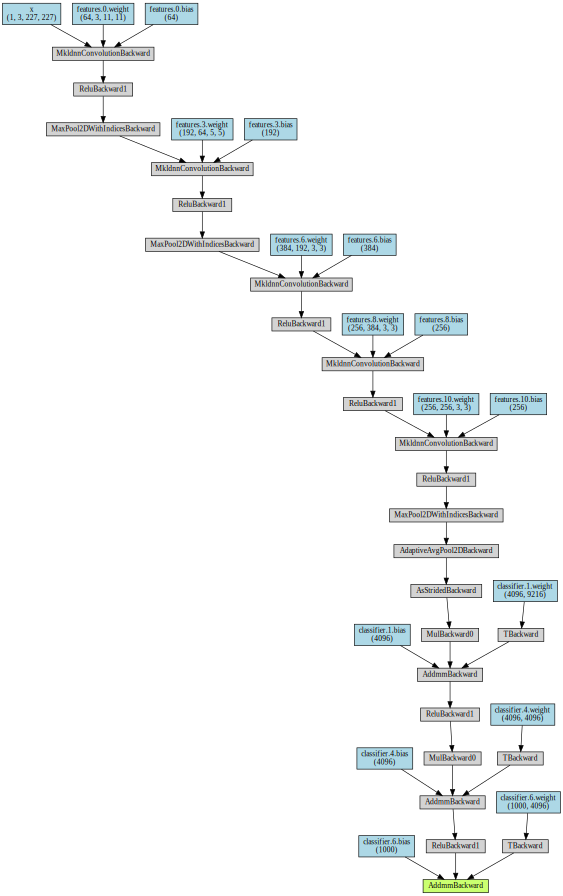

In [17]:
from torchvision.models import AlexNet

model = AlexNet()

x = torch.randn(1, 3, 227, 227).requires_grad_(True)
y = model(x)
make_dot(y, params=dict(list(model.named_parameters()) + [('x', x)]))

In [18]:
def double_backprop(inputs, net):
    y = net(x).mean()
    grad,  = torch.autograd.grad(y, x, create_graph=True, retain_graph=True)
    return grad.pow(2).mean() + y

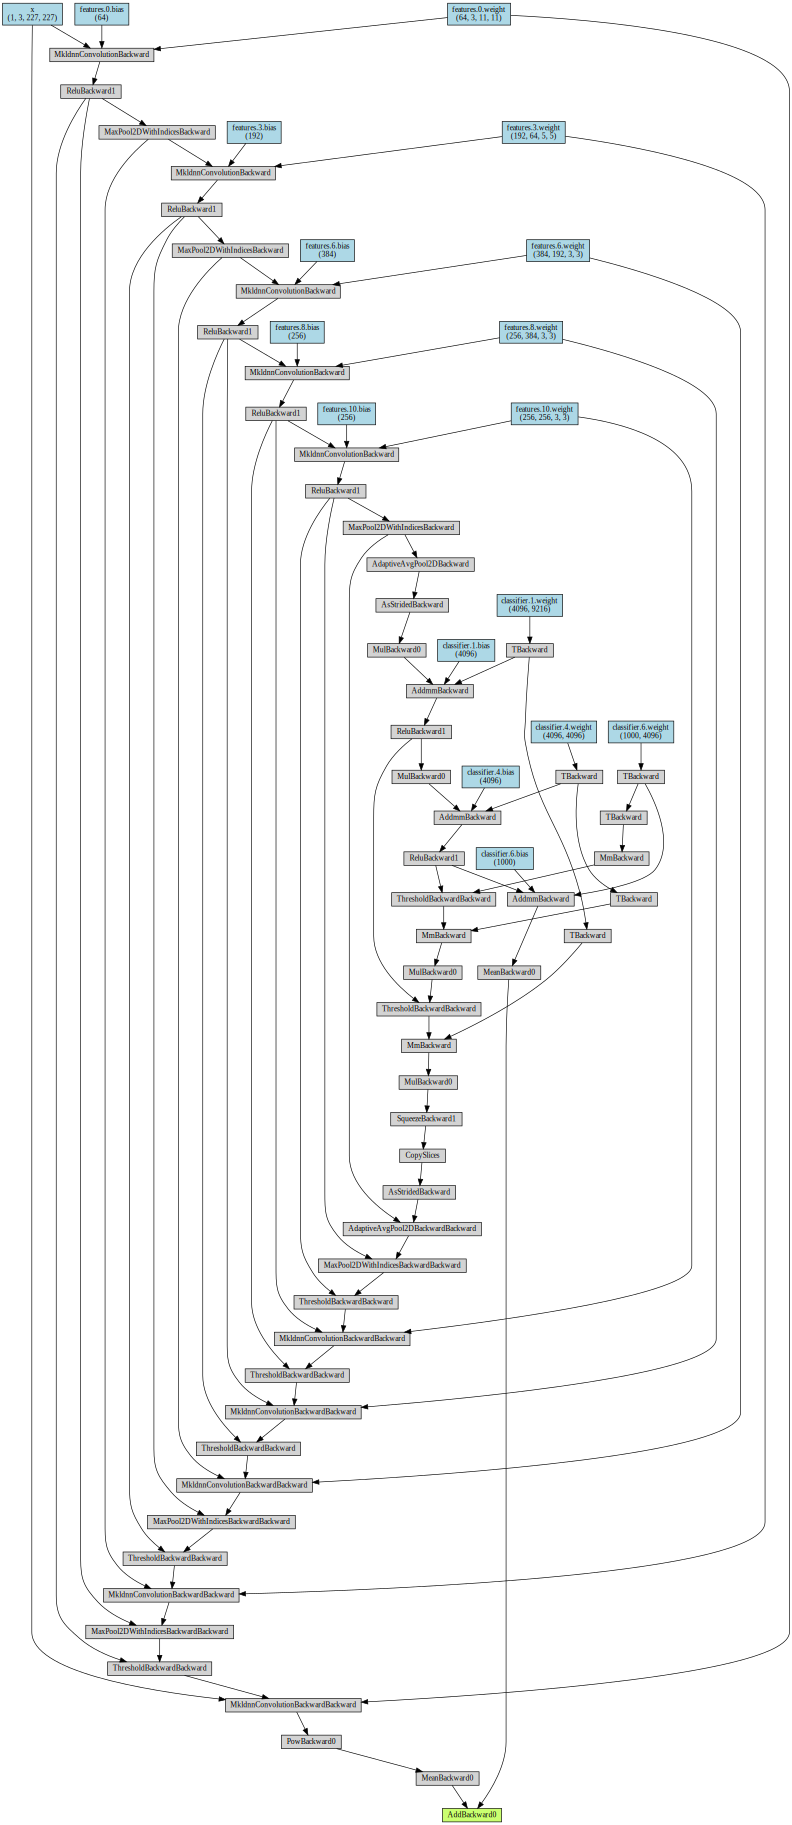

In [19]:
make_dot(double_backprop(x, model), params=dict(list(model.named_parameters()) + [('x', x)]))
